## Load Dataset

In [ ]:
from google.colab import files

# Menjalankan fungsi upload untuk memilih file dari direktori lokal
uploaded = files.upload()

# Menampilkan nama file yang berhasil diunggah
for filename in uploaded.keys():
    print(f"File '{filename}' berhasil diunggah.")

file_path = list(uploaded.keys())[0]


Saving Sample - Superstore.csv to Sample - Superstore.csv
File 'Sample - Superstore.csv' berhasil diunggah.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Import the data
df = pd.read_csv('/content/Sample - Superstore.csv')

## Preprocessing

In [ ]:
# Menampilkan beberapa baris pertama dataset untuk eksplorasi awal
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Menampilkan informasi tipe data dan cek missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Exploratory Data Analysis

In [ ]:
# Descriptive statistics
print(df.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


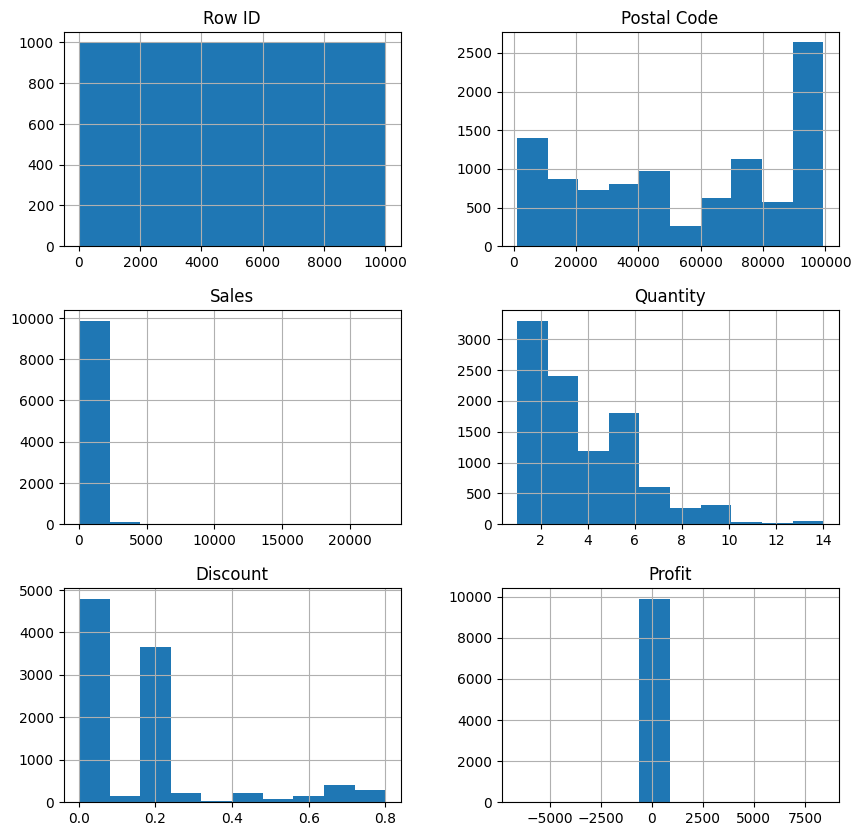

In [ ]:
df.hist(figsize=(10, 10))
plt.show()

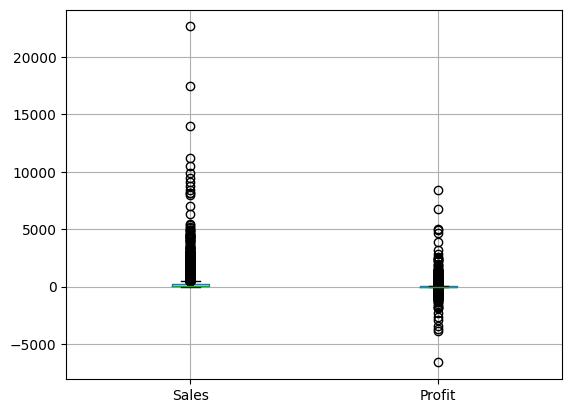

In [ ]:
# Box Plot
columns = ['Sales', 'Profit']

plt.figure()
df.boxplot(column=columns)
plt.show()

<ipython-input-10-6c75500027d9>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Sales', data=sales_profit_by_month, label='Sales', ci=None)
<ipython-input-10-6c75500027d9>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Profit', data=sales_profit_by_month, label='Profit', ci=None)


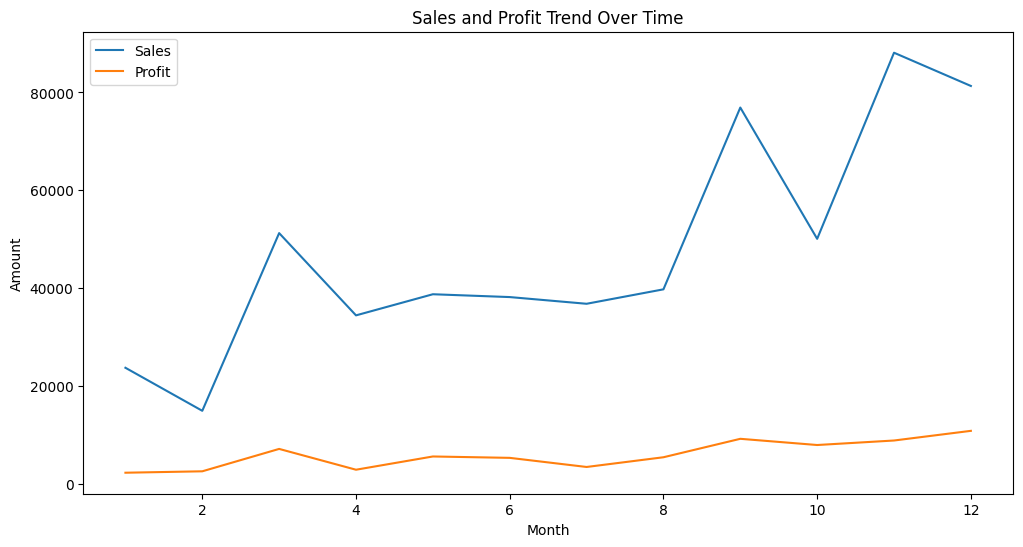

In [ ]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract month and year from 'Order Date'
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Group data by year and month, and calculate the sum of sales and profit
sales_profit_by_month = df.groupby(['Year', 'Month'])[['Sales', 'Profit']].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', data=sales_profit_by_month, label='Sales', ci=None)
sns.lineplot(x='Month', y='Profit', data=sales_profit_by_month, label='Profit', ci=None)
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Sales and Profit Trend Over Time')
plt.legend()
plt.show()

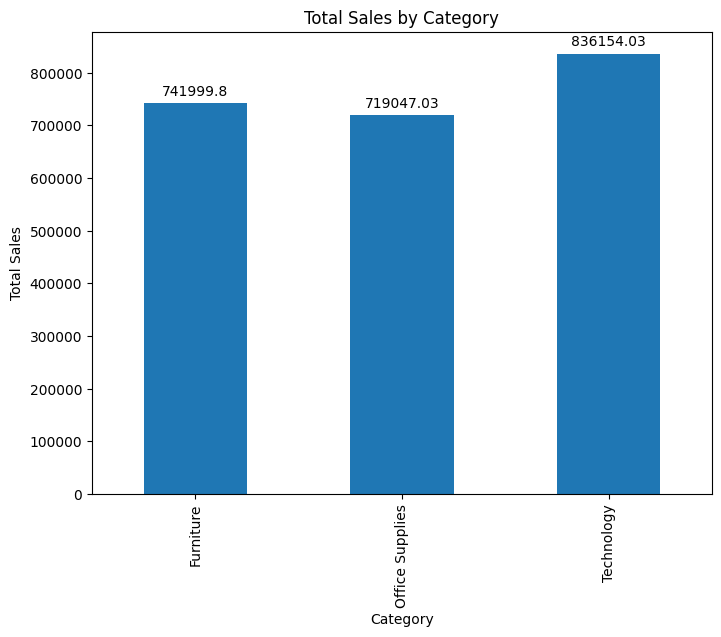

In [ ]:
# Calculate total sales for each category
sales_by_category = df.groupby('Category')['Sales'].sum()

# Create a bar chart
plt.figure(figsize=(8, 6))
ax = sales_by_category.plot(kind='bar')
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Category")

# Add total sales as text on top of each bar
for i, v in enumerate(sales_by_category):
    ax.text(i, v + 10000, str(round(v, 2)), ha='center', va='bottom')

plt.show()

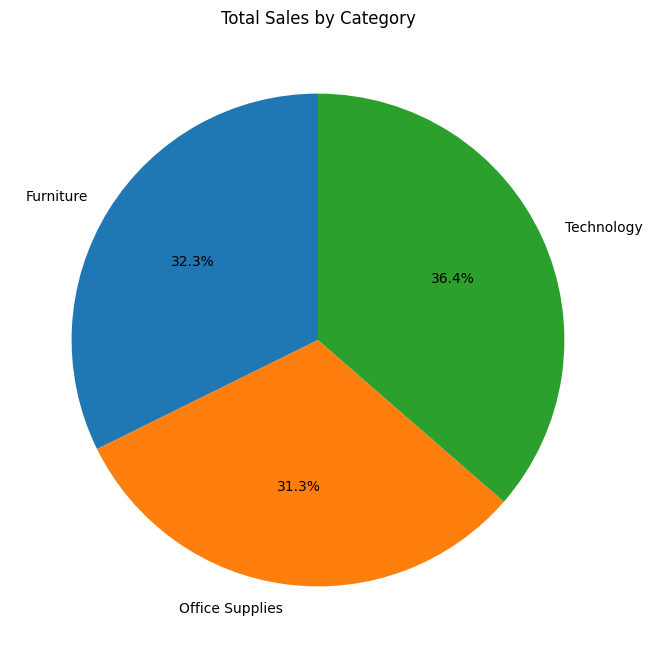

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


In [ ]:
# Calculate total sales for each category
sales_by_category = df.groupby('Category')['Sales'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Sales by Category')
plt.show()
sales_by_category

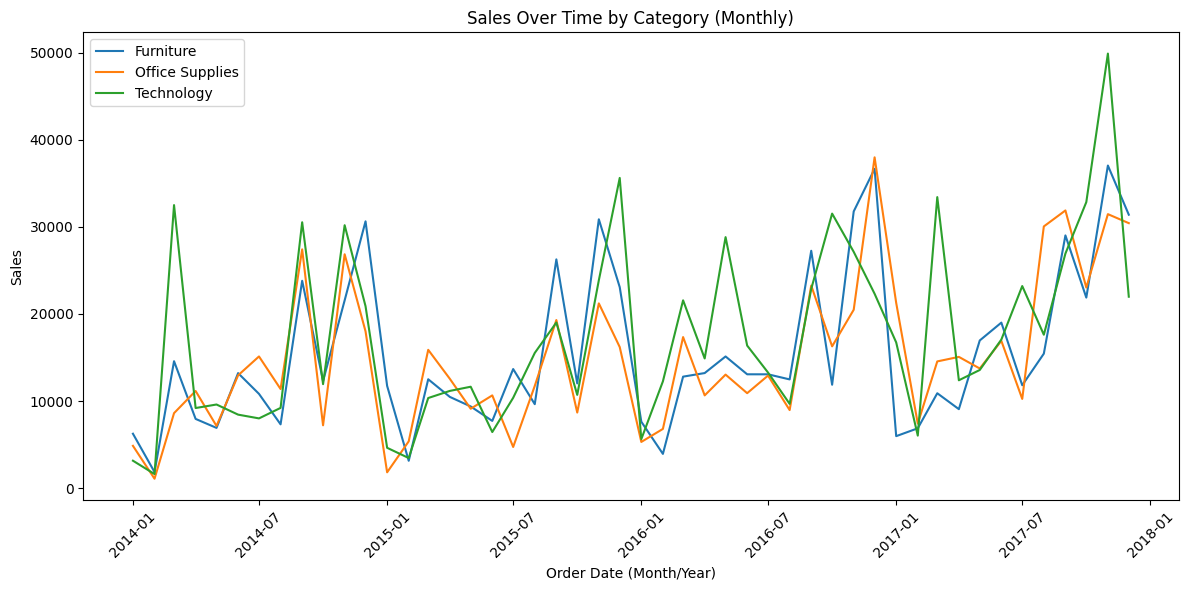

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract month and year from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Group data by 'Category', 'Year', and 'Month', and calculate the sum of sales
sales_by_month = df.groupby(['Category', 'Year', 'Month'])['Sales'].sum().reset_index()

# Create a new 'Date' column with 'Year' and 'Month'
sales_by_month['Date'] = pd.to_datetime(sales_by_month[['Year', 'Month']].assign(Day=1))

# Plot the line chart for each category
plt.figure(figsize=(12, 6))

# Plot for each category
categories = df['Category'].unique()
for category in categories:
    category_data = sales_by_month[sales_by_month['Category'] == category]
    plt.plot(category_data['Date'], category_data['Sales'], label=category)

# Set the labels and title
plt.xlabel('Order Date (Month/Year)')
plt.ylabel('Sales')
plt.title('Sales Over Time by Category (Monthly)')

# Add a legend to differentiate the categories
plt.legend()

# Format the x-axis to show month and year properly
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

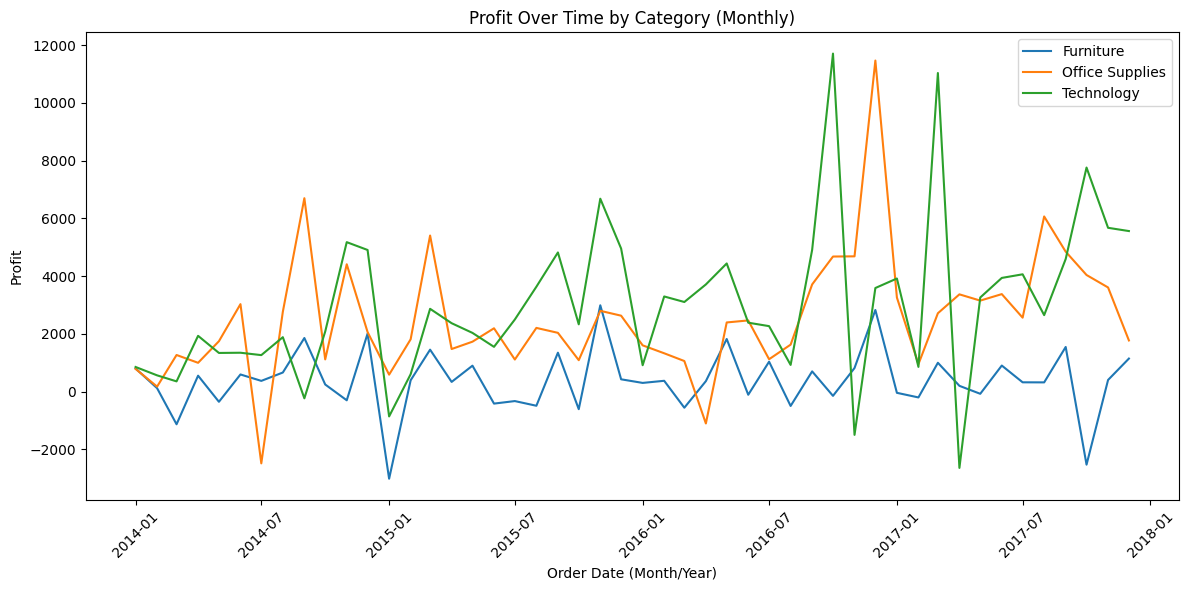

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract month and year from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Group data by 'Category', 'Year', and 'Month', and calculate the sum of sales
sales_by_month = df.groupby(['Category', 'Year', 'Month'])['Profit'].sum().reset_index()

# Create a new 'Date' column with 'Year' and 'Month'
sales_by_month['Date'] = pd.to_datetime(sales_by_month[['Year', 'Month']].assign(Day=1))

# Plot the line chart for each category
plt.figure(figsize=(12, 6))

# Plot for each category
categories = df['Category'].unique()
for category in categories:
    category_data = sales_by_month[sales_by_month['Category'] == category]
    plt.plot(category_data['Date'], category_data['Profit'], label=category)

# Set the labels and title
plt.xlabel('Order Date (Month/Year)')
plt.ylabel('Profit')
plt.title('Profit Over Time by Category (Monthly)')

# Add a legend to differentiate the categories
plt.legend()

# Format the x-axis to show month and year properly
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Forecasting

## Siapkan Function

In [ ]:
# Ambil kategori furniture saja
df = df[df['Category'] == 'Furniture']

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015
5,6,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,6,2014
10,11,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,6,2014


In [ ]:
# Define function untuk window dataset time-series
import numpy as np

def create_windowed_dataset(series, window_size):
    """
    Membuat pasangan (X, y) untuk time series forecasting.

    Args:
        series (numpy array): Data time series (misalnya kolom 'Sales').
        window_size (int): Panjang window.

    Returns:
        X (numpy array): Data input dengan dimensi (samples, window_size).
        y (numpy array): Data output (target) dengan dimensi (samples,).
    """
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size])  # Window input
        y.append(series[i + window_size])   # Target output
    return np.array(X), np.array(y)

In [ ]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Ambil feature order date dan sales
df = df[['Order Date', 'Sales']]

# Set order date sebagai index, sedangkan sales menjadi values
df.sort_values(by='Order Date', inplace=True)
df.set_index('Order Date', inplace=True)

df

<ipython-input-18-91a162d28682>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])


,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940
...,...
2017-12-29,258.750
2017-12-29,1207.840
2017-12-29,101.120


In [ ]:
# Resample data ke frekuensi bulanan, mengambil rata-rata nilai penjualan harian
df = df['Sales'].resample('MS').mean()

# Tampilkan hasil
df

,Sales
Order Date,
2014-01-01,312.126250
2014-02-01,262.808286
2014-03-01,441.635030
2014-04-01,305.570654
2014-05-01,288.032792
2014-06-01,440.204187
2014-07-01,327.910636
2014-08-01,305.014438
2014-09-01,425.294300


In [ ]:
# Tentukan panjang window
window_size = 2  # Misalnya, menggunakan 3 bulan sebelumnya untuk memprediksi bulan ke-4

# Buat dataset windowed
X, y = create_windowed_dataset(df, window_size)

# Cek bentuk data hasil windowing
print("X shape:", X.shape)  # (num_samples, window_size)
print("y shape:", y.shape)  # (num_samples,)

X shape: (46, 2)
y shape: (46,)


<ipython-input-17-0e6e6a03a356>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(series[i + window_size])   # Target output


In [ ]:
# Simpan data asli untuk keperluan evaluasi
indices = df.index

In [ ]:
from sklearn.model_selection import train_test_split

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Periksa hasil split
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (34, 2)
Test set size: (12, 2)


In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
# Ubah menjadi 3D (timesteps=window_size, features=1)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print("X_train 3D shape:", X_train.shape)  # (samples, timesteps, features)

X_train 3D shape: (34, 2, 1)


In [ ]:
# Import Library dan Define Parameters
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Hyperparameters
window_size = 50  # Sesuaikan dengan panjang window data
learning_rate = 1e-2
epochs = 40
batch_size = 8

In [ ]:
# Fungsi untuk membuat model
def create_model_1():
    """Bidirectional LSTM"""
    model = Sequential([
        LSTM(100, activation='relu', return_sequences=True, input_shape=(window_size, 1)),
        Bidirectional(LSTM(100, activation='relu', return_sequences=True)),
        Dense(1)
    ])
    return model

def create_model_2():
    """Stacked LSTM"""
    model = Sequential([
        LSTM(100, activation='relu', return_sequences=True, input_shape=(window_size, 1)),
        LSTM(100, activation='relu'),
        Dense(1)
    ])
    return model

def create_model_3():
    """Vanilla LSTM"""
    model = Sequential([
        LSTM(100, activation='relu', return_sequences=True, input_shape=(window_size, 1)),
        Dense(1)
    ])
    return model

# List model
models = {
    "Model 1: LSTM + Bidirectional": create_model_1(),
    "Model 2: Stacked LSTM": create_model_2(),
    "Model 3: Simple LSTM": create_model_3()
}

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔹 Training Model 1: LSTM + Bidirectional...

Epoch 1/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 873ms/step - loss: 84487.2969 - val_loss: 19863.5566
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 25260.6426 - val_loss: 31578.2109
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18972.5430 - val_loss: 15534.6221
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 17560.3750 - val_loss: 11918.6172
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13066.9863 - val_loss: 14611.5557
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11635.7461 - val_loss: 11693.1123
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13570.7061 - val_loss: 11849.5576
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11934.2646 - val_loss: 12209.1016
Epoch 9/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11328.9238 - val_loss: 11415.0537
Epoch 10/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12193.8145 - val_loss: 11330.9873
Epoch 11/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1

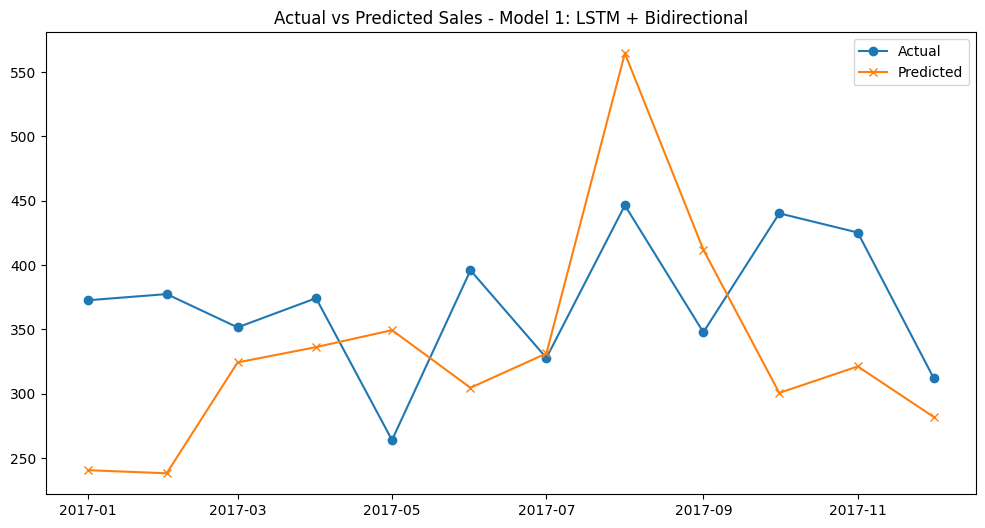

MSE  : 8654.6375
RMSE : 93.0303
MAPE : 21.4430%
📁 Model Model 1: LSTM + Bidirectional saved!


🔹 Training Model 2: Stacked LSTM...

Epoch 1/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 696ms/step - loss: 96789.8984 - val_loss: 20434.2871
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 17196.1465 - val_loss: 12736.2500
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 12804.6953 - val_loss: 11198.5537
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11824.4453 - val_loss: 10754.6445
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 12171.2393 - val_loss: 10897.2061
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11269.1670 - val_loss: 10386.2217
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 12176.5459 - val_loss: 10556.8369
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11461.9375 - val_loss: 9887.8398
Epoch 9/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12092.2793 - val_loss: 9776.0635
Epoch 10/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 

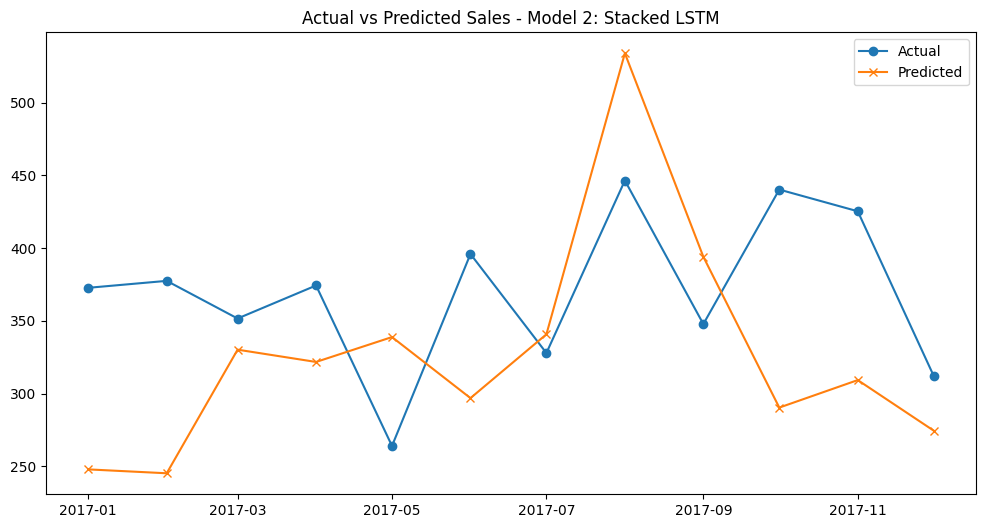

MSE  : 8240.4754
RMSE : 90.7771
MAPE : 21.0058%
📁 Model Model 2: Stacked LSTM saved!


🔹 Training Model 3: Simple LSTM...

Epoch 1/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 442ms/step - loss: 120752.1719 - val_loss: 83200.2891
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 57766.5586 - val_loss: 39800.8945
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 36632.0352 - val_loss: 31479.0410
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 30753.6855 - val_loss: 26052.0410
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 23743.1914 - val_loss: 21381.5254
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19126.2344 - val_loss: 16211.0732
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 16360.2871 - val_loss: 15141.7139
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14851.5664 - val_loss: 16057.5225
Epoch 9/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13588.9238 - val_loss: 18378.3496
Epoch 10/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss

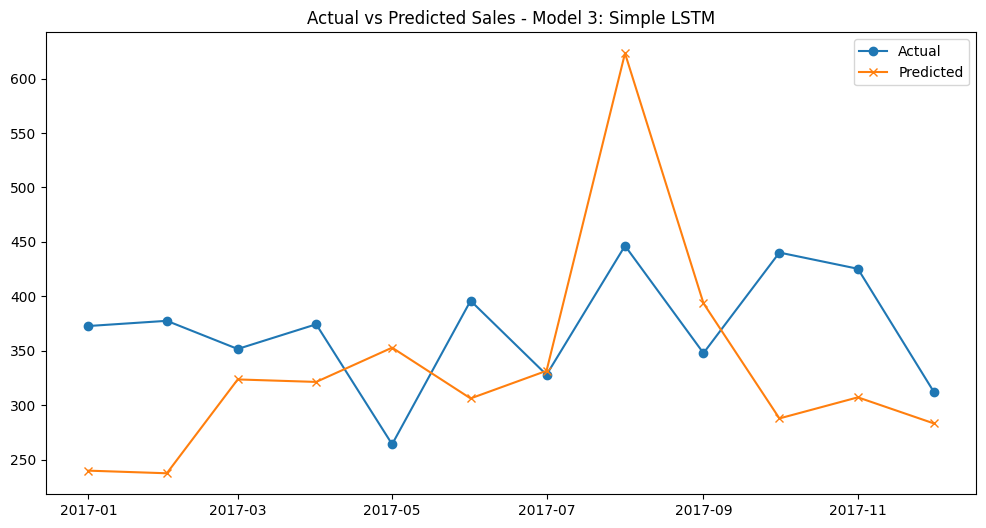

MSE  : 10681.9274
RMSE : 103.3534
MAPE : 23.0565%
📁 Model Model 3: Simple LSTM saved!



In [ ]:
# Training & Evaluasi Model
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...\n")

    # Compile Model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    # Train Model
    history = model.fit(X_train, y_train,
                        epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, y_test),
                        verbose=1)

    print(f"✅ {name} training selesai!\n")

    # Evaluasi Model
    print(f"\n🔹 Evaluating {name}...\n")

    # Prediksi pada data test
    y_pred = model.predict(X_test)

    # Opsional: Ambil nilai terakhir jika output berbentuk 3D
    if y_pred.ndim == 3:
        y_pred = y_pred[:, -1, 0]

    # Ambil indeks untuk plotting
    len_indices = int(0.75 * len(indices))
    test_indices = indices[len_indices:]

    # Visualisasi hasil prediksi
    plt.figure(figsize=(12, 6))
    plt.plot(test_indices, y_test, label='Actual', marker='o')
    plt.plot(test_indices, y_pred, label='Predicted', marker='x')
    plt.legend()
    plt.title(f"Actual vs Predicted Sales - {name}")
    plt.show()

    # Evaluasi MSE, RMSE, MAPE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f"MSE  : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"MAPE : {mape:.4%}")

    results[name] = {"MSE": mse, "RMSE": rmse, "MAPE": mape}

    # Simpan model setelah training
    model.save(f"{name.replace(' ', '_')}.h5")
    print(f"📁 Model {name} saved!\n")

In [ ]:
# Menampilkan hasil perbandingan
print("\n📊 **Comparison Results**")
for name, metrics in results.items():
    print(f"\n🔹 {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

print("\n✅ Semua model selesai dilatih, dievaluasi, dan disimpan!")


📊 **Comparison Results**

🔹 Model 1: LSTM + Bidirectional
MSE: 8654.6375
RMSE: 93.0303
MAPE: 0.2144

🔹 Model 2: Stacked LSTM
MSE: 8240.4754
RMSE: 90.7771
MAPE: 0.2101

🔹 Model 3: Simple LSTM
MSE: 10681.9274
RMSE: 103.3534
MAPE: 0.2306

✅ Semua model selesai dilatih, dievaluasi, dan disimpan!


## Download Files

In [45]:
from google.colab import files

# Gantilah dengan nama file yang ingin diunduh
files.download("Model_1:_LSTM_+_Bidirectional.h5")
files.download("Model_2:_Stacked_LSTM.h5")
files.download("Model_3:_Simple_LSTM.h5")
files.download("Sample - Superstore.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>